In [1]:
import sys
import os
workspace_path = os.path.join(os.path.abspath(".."))
sys.path.append(workspace_path)
workspace_path

'c:\\Users\\Kajsa\\VSCodeProjects\\job_discrimination_sandbox'

In [2]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import glob
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
pd.options.display.float_format = "{:.2f}".format

In [4]:
def lemmatize(list_of_str):
    """Iterates over a list of strings and converts them to lemmas."""
    lemmatizer = WordNetLemmatizer()
    list_of_lemmas = [lemmatizer.lemmatize(word) for word in list_of_str]

    return list_of_lemmas

In [5]:
def get_contents(file_paths) -> list:
    """Create list of contents from all files in a list of file paths"""
    contents = []
    file_names = []
    for file_path in file_paths:
        with open(file_path) as f:
            # Remove newlines
            content = f.read().replace("\n", " ")
            # Remove numbers
            content = re.sub("\d", "", content)
        contents.append(content)
        file_names.append(os.path.basename(file_path))

    return file_names, contents

In [6]:
def count_word_freq(text_sample, words) -> pd.DataFrame:
    """
    Counts the frequency of a list of words in a text.

    Parameters
    ----------
    text_sample : str
        The text to count words in.

    words : list
        Words to count.

    Returns
    -------
    df_words : pd.DataFrame
        A dataframe with the words as column headers and the count on index 0.
    """
    # Create vector with count of words in the text sample
    vectorizer = CountVectorizer()
    # vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text_sample])
    df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Create iterable with all words in the text sample
    words_in_doc = set(df_bow.columns.values)

    # Create a new list with the words that are common between words_in_doc and words
    words_in_common = list(words_in_doc.intersection(words))
    df_words = df_bow[words_in_common]
    return df_words

# List all available bulletins

In [7]:
path_to_cleaned_data = os.path.join(workspace_path, "data", "cleaned_data")
file_dir = os.path.join(path_to_cleaned_data, "Job_Bulletins", "labeled", "*")
file_paths = glob.glob(file_dir)

# Lemmatizing wordlists

In [8]:
# Read feminine and masculine words
with open(os.path.join(path_to_cleaned_data, "men-ad-words.txt")) as f:
    masculine_words = f.read().splitlines()
with open(os.path.join(path_to_cleaned_data, "women-ad-words.txt")) as f:
    feminine_words = f.read().splitlines()

In [9]:
masc_lemmas = lemmatize(masculine_words)
fem_lemmas = lemmatize(feminine_words)

In [10]:
for i in zip(masculine_words, masc_lemmas):
    print(i)

for i in zip(feminine_words, fem_lemmas):
    print(i)

('active', 'active')
('lead', 'lead')
('independent', 'independent')
('adventurous', 'adventurous')
('headstrong', 'headstrong')
('outspoken', 'outspoken')
('dominant', 'dominant')
('fearless', 'fearless')
('focus', 'focus')
('efficiency', 'efficiency')
('strength', 'strength')
('strategic', 'strategic')
('individual', 'individual')
('driven', 'driven')
('fearless', 'fearless')
('confident', 'confident')
('efficiency', 'efficiency')
('determined', 'determined')
('impulsive', 'impulsive')
('autonomy', 'autonomy')
('he', 'he')
('him', 'him')
('his', 'his')
('himself', 'himself')
('compassion', 'compassion')
('honest', 'honest')
('kind', 'kind')
('nurturing', 'nurturing')
('loyal', 'loyal')
('considerate', 'considerate')
('trust', 'trust')
('empathy', 'empathy')
('community', 'community')
('growth', 'growth')
('appreciation', 'appreciation')
('connect', 'connect')
('sensitive', 'sensitive')
('relationships', 'relationship')
('communication', 'communication')
('companionship', 'companionsh

# Getting bulletin texts and lemmatizing them

In [11]:
file_names, contents = get_contents(file_paths)

In [12]:
lists_of_lemmas = []
for content in contents:
    content = content.split()
    lemmatized = lemmatize(content)
    lists_of_lemmas.append(lemmatized)
    # Checking lemmas
    for item in (zip(content, lemmatized)):
        if item[0] != item[1]:
            print(item)

('answers', 'answer')
('constituents', 'constituent')
('services', 'service')
('works', 'work')
('issues', 'issue')
('coordinates', 'coordinate')
('employees', 'employee')
('operations', 'operation')
('principles', 'principle')
('techniques', 'technique')
('does', 'doe')
('as', 'a')
('agents', 'agent')
('calls', 'call')
('years', 'year')
('agents', 'agent')
('calls', 'call')
('years', 'year')
('years', 'year')
('agents', 'agent')
('calls', 'call')
('years', 'year')
('applicants', 'applicant')
('months', 'month')
('less', 'le')
('sales', 'sale')
('systems', 'system')
('bulletins', 'bulletin')
('candidates', 'candidate')
('qualifications', 'qualification')
('assess', 'ass')
('candidates', 'candidate')
('as', 'a')
('duties', 'duty')
('applicants', 'applicant')
('applicants', 'applicant')
('applicants', 'applicant')
('as', 'a')
('applicants', 'applicant')
('requirements', 'requirement')
('numbers', 'number')
('needs', 'need')
('applications', 'application')
('years', 'year')
('applicants',

In [13]:
# Putting the lists of lemmas back to strings, to fit input requirements to count vectorizer
string_of_lemmas = [" ".join(lemmas) for lemmas in lists_of_lemmas]

In [14]:
df_content = pd.DataFrame({"File Names": file_names, "lemmatized_contents": string_of_lemmas})

In [15]:
df_content

,File Names,lemmatized_contents
0,311 DIRECTOR 9206,DIRECTOR Class Code: Open Date: -- ANNUAL SALA...
1,ACCOUNTING CLERK 1223,ACCOUNTING CLERK Class Code: Open Date: -- (Ex...
2,AIR CONDITIONING MECHANIC 3774,AIR CONDITIONING MECHANIC Class Code: Open Dat...
3,AIRPORT MANAGER 7260,AIRPORT MANAGER Class Code: Open Date: -- (Exa...
4,AIRPORT POLICE LIEUTENANT 3227,AIRPORT POLICE LIEUTENANT Class Code: Open Dat...
...,...,...
172,WATERWORKS MECHANIC SUPERVISOR 3987,WATERWORKS MECHANIC SUPERVISOR Class Code: Ope...
173,WELDER 3796,WELDER Class Code: Open Date: -- (Exam Open to...
174,WHARFINGER 1190,WHARFINGER Class Code: Open Date: -- (Exam Ope...
175,WORKERS COMPENSATION ANALYST 1774,WORKERS' COMPENSATION ANALYST Class Code: Open...


In [16]:
# Counting frequency of masculine and feminine words in each bulletin
masculine_dfs = []
feminine_dfs = []
for content in string_of_lemmas:
    df_m = count_word_freq(content, masc_lemmas)
    df_f = count_word_freq(content, fem_lemmas)
    masculine_dfs.append(df_m)
    feminine_dfs.append(df_f)

# Concatenate all masculine and feminine count dfs
masc_df = pd.concat(masculine_dfs, ignore_index=True)
fem_df = pd.concat(feminine_dfs, ignore_index=True)


In [59]:
# Checking the number of bulletins that go within each count for masculine words
masc_df.sum(axis=1).value_counts().sort_values(ascending=False).to_frame(name="No of ads, masculine words")

,"No of ads, masculine words"
1.00,80
2.00,58
3.00,21
4.00,11
7.00,3
5.00,2
6.00,2


In [18]:
# Count of the total number of occurrences of words from the masculine list
masc_df.sum().sort_values(ascending=False)

determined    230.00
lead           28.00
focus          28.00
independent    20.00
individual     15.00
strategic       8.00
efficiency      7.00
active          4.00
strength        3.00
his             2.00
driven          1.00
dtype: float64

In [57]:
# Checking the number of bulletins that go within each count for feminine words
# Note that the majority of the bulletins had no occurence of a word from the feminine list
fem_df.sum(axis=1).value_counts().sort_values(ascending=False).to_frame(name="No of ads, feminine words")

,"No of ads, feminine words"
0.00,103
1.00,31
2.00,22
3.00,9
4.00,5
6.00,4
7.00,2
12.00,1


In [20]:
# Count of the total number of occurrences of words from the feminine list
fem_df.sum().sort_values(ascending=False)

communication   115.00
community        45.00
sensitive         4.00
kind              3.00
her               2.00
relationship      2.00
supporting        1.00
dtype: float64

# Pick up application statistics and merge with word counts

In [21]:
# Reading application statistics into dataframe
file_path = os.path.join(path_to_cleaned_data, "applicants.csv")
df = pd.read_csv(file_path, dtype={"ID": str})
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206 041814.txt
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223 071318.txt
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260 120216.txt
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227 091616.txt
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400 050214.txt
...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840 1...
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 120718.txt
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857 072514 rev073114.txt
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912 120817.txt


In [22]:
# Replacing old file names with cleaned versions
df["File Names"] = df["Job Description"] + " " + df["ID"]
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400
...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 4123
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912


In [23]:
df = df.merge(df_content, how="inner", on="File Names")

In [24]:
# Create and add labels to categorize the distribution of applicants
mostly_women = df["Female"] >= (df["Apps Received"] - df["Unknown_Gender"]) * 0.6
mostly_men = df["Male"] >= (df["Apps Received"] - df["Unknown_Gender"]) * 0.6
neutral = (df["Female"] < (df["Apps Received"] - df["Unknown_Gender"]) * 0.6) & (df["Female"] > (df["Apps Received"] - df["Unknown_Gender"]) * 0.4)

In [25]:
labels = []
for i in range(len(df)):
    if mostly_women[i]:
        label = "W"
    elif mostly_men[i]:
        label = "M"
    elif neutral[i]:
        label = "N"
    else:
        label = None
    labels.append(label)
df["Labels"] = labels


In [26]:
df["Labels"].value_counts()

M    126
N     32
W     19
Name: Labels, dtype: int64

In [27]:
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,lemmatized_contents,Labels
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206,DIRECTOR Class Code: Open Date: -- ANNUAL SALA...,M
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223,ACCOUNTING CLERK Class Code: Open Date: -- (Ex...,W
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260,AIRPORT MANAGER Class Code: Open Date: -- (Exa...,M
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227,AIRPORT POLICE LIEUTENANT Class Code: Open Dat...,M
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400,AQUARIST Class Code: Open Date: -- ANNUAL SALA...,M
...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840,WASTEWATER TREATMENT LABORATORY MANAGER Class ...,M
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 4123,WASTEWATER TREATMENT OPERATOR Class Code: Open...,M
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857,WATER MICROBIOLOGIST Class Code: Open Date: --...,N
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912,WATER UTILITY WORKER Class Code: Open Date: --...,M


In [28]:
# Checking for null-values
df.isnull().sum()

ID                     0
Job Description        0
Apps Received          0
Female                 0
Male                   0
Unknown_Gender         0
File Names             0
lemmatized_contents    0
Labels                 0
dtype: int64

In [29]:
df["male_word_count"] = masc_df.sum(axis=1)
df["fem_word_count"] = fem_df.sum(axis=1)
df["male_share"] = df["Male"] / df["Apps Received"]
df["fem_share"] =df["Female"] / df["Apps Received"]
df

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,File Names,lemmatized_contents,Labels,male_word_count,fem_word_count,male_share,fem_share
0,9206,311 DIRECTOR,54,20,31,3,311 DIRECTOR 9206,DIRECTOR Class Code: Open Date: -- ANNUAL SALA...,M,1.00,0.00,0.57,0.37
1,1223,ACCOUNTING CLERK,648,488,152,8,ACCOUNTING CLERK 1223,ACCOUNTING CLERK Class Code: Open Date: -- (Ex...,W,2.00,0.00,0.23,0.75
2,7260,AIRPORT MANAGER,51,13,37,1,AIRPORT MANAGER 7260,AIRPORT MANAGER Class Code: Open Date: -- (Exa...,M,1.00,0.00,0.73,0.25
3,3227,AIRPORT POLICE LIEUTENANT,48,9,38,1,AIRPORT POLICE LIEUTENANT 3227,AIRPORT POLICE LIEUTENANT Class Code: Open Dat...,M,1.00,2.00,0.79,0.19
4,2400,AQUARIST,40,15,24,1,AQUARIST 2400,AQUARIST Class Code: Open Date: -- ANNUAL SALA...,M,2.00,0.00,0.60,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,7840,WASTEWATER TREATMENT LABORATORY MANAGER,16,6,9,1,WASTEWATER TREATMENT LABORATORY MANAGER 7840,WASTEWATER TREATMENT LABORATORY MANAGER Class ...,M,1.00,2.00,0.56,0.38
173,4123,WASTEWATER TREATMENT OPERATOR,125,9,113,3,WASTEWATER TREATMENT OPERATOR 4123,WASTEWATER TREATMENT OPERATOR Class Code: Open...,M,1.00,0.00,0.90,0.07
174,7857,WATER MICROBIOLOGIST,179,89,82,8,WATER MICROBIOLOGIST 7857,WATER MICROBIOLOGIST Class Code: Open Date: --...,N,1.00,0.00,0.46,0.50
175,3912,WATER UTILITY WORKER,96,2,92,2,WATER UTILITY WORKER 3912,WATER UTILITY WORKER Class Code: Open Date: --...,M,6.00,3.00,0.96,0.02


# Experimenting with ways to visualize results

<AxesSubplot: xlabel='male_word_count', ylabel='male_share'>

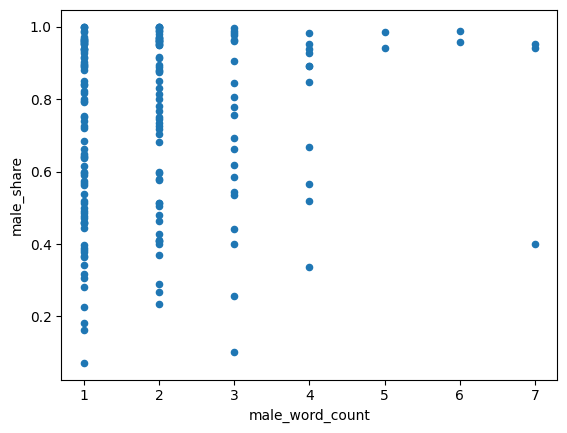

In [30]:
df.plot(kind="scatter", x="male_word_count", y="male_share")

<AxesSubplot: xlabel='fem_word_count', ylabel='fem_share'>

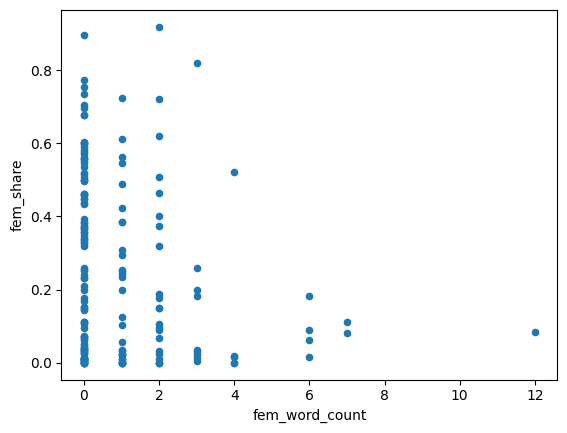

In [31]:
df.plot(kind="scatter", x="fem_word_count", y="fem_share")

<AxesSubplot: xlabel='male_word_count', ylabel='fem_word_count'>

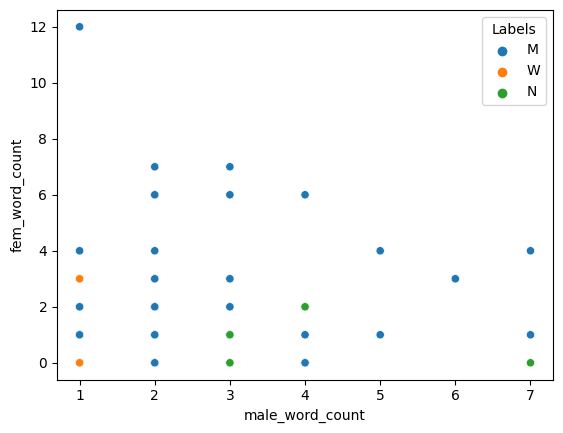

In [32]:
sns.scatterplot(data=df, x="male_word_count", y="fem_word_count", hue="Labels")

<AxesSubplot: xlabel='male_share', ylabel='fem_share'>

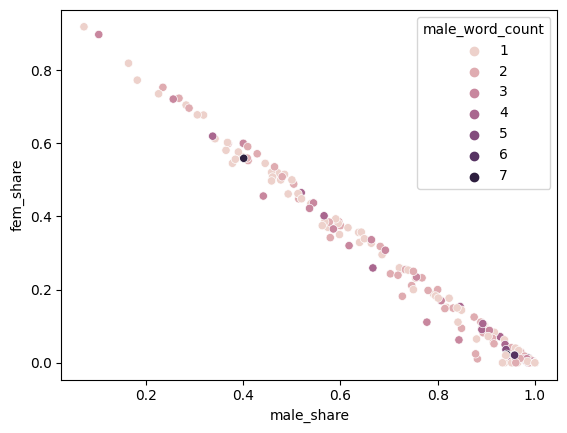

In [33]:
sns.scatterplot(data=df, x="male_share", y="fem_share", hue="male_word_count")

<AxesSubplot: xlabel='male_share', ylabel='fem_share'>

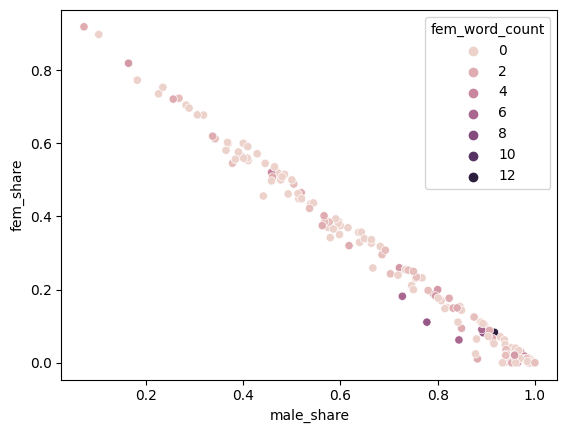

In [34]:
sns.scatterplot(data=df, x="male_share", y="fem_share", hue="fem_word_count")

C:\Users\Kajsa\AppData\Local\Temp\ipykernel_16636\906918719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<AxesSubplot: >

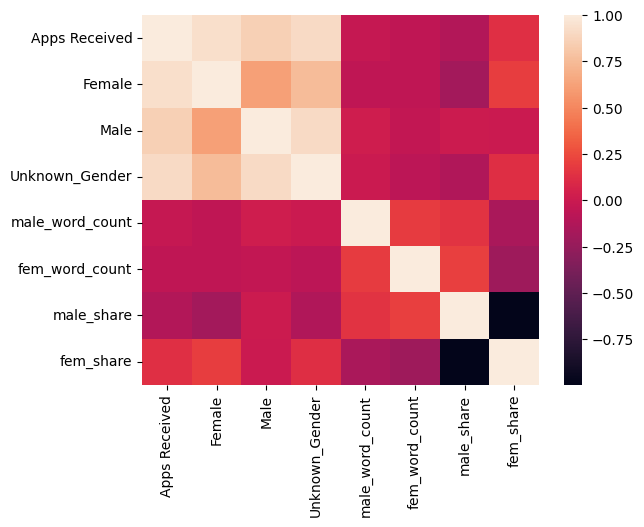

In [35]:
sns.heatmap(data=df.corr())

In [50]:
df[["male_word_count", "fem_word_count", "male_share", "fem_share"]].corr(numeric_only=True)

,male_word_count,fem_word_count,male_share,fem_share
male_word_count,1.00,0.18,0.15,-0.15
fem_word_count,0.18,1.00,0.20,-0.21
male_share,0.15,0.20,1.00,-1.00
fem_share,-0.15,-0.21,-1.00,1.00


In [44]:
df.drop(labels=["File Names", "lemmatized_contents"], axis=1).sort_values(by="male_word_count", ascending=False).head(20)

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,Labels,male_word_count,fem_word_count,male_share,fem_share
157,3843,INSTRUMENT MECHANIC,172,4,162,6,M,7.00,1.00,0.94,0.02
38,2131,ENGINEER OF FIRE DEPARTMENT,558,9,532,17,M,7.00,4.00,0.95,0.02
150,1136,DATA PROCESSING TECHNICIAN,1175,657,471,47,N,7.00,0.00,0.40,0.56
175,3912,WATER UTILITY WORKER,96,2,92,2,M,6.00,3.00,0.96,0.02
89,3638,SENIOR COMMUNICATIONS ELECTRICIAN,77,1,76,0,M,6.00,3.00,0.99,0.01
31,3873,ELECTRIC DISTRIBUTION MECHANIC SUPERVISOR,149,0,147,2,M,5.00,4.00,0.99,0.00
149,7291,CONSTRUCTION INSPECTOR,471,17,443,11,M,5.00,1.00,0.94,0.04
104,1521,SENIOR UTILITY ACCOUNTANT,92,57,31,4,W,4.00,2.00,0.34,0.62
112,5630,STEAM PLANT MAINTENANCE MECHANIC,55,5,49,1,M,4.00,6.00,0.89,0.09
22,3802,COMMUNICATIONS CABLE WORKER,393,2,386,5,M,4.00,1.00,0.98,0.01


In [45]:
df.drop(labels=["File Names", "lemmatized_contents"], axis=1).sort_values(by="fem_word_count", ascending=False).head(20)

,ID,Job Description,Apps Received,Female,Male,Unknown_Gender,Labels,male_word_count,fem_word_count,male_share,fem_share
114,3840,STREET LIGHTING ELECTRICIAN SUPERVISOR,12,1,11,0,M,1.00,12.00,0.92,0.08
10,6147,AUDIO VISUAL TECHNICIAN,329,27,294,8,M,2.00,7.00,0.89,0.08
98,5235,SENIOR LOAD DISPATCHER,18,2,14,2,M,3.00,7.00,0.78,0.11
113,3786,STEAM PLANT MAINTENANCE SUPERVISOR,32,2,27,3,M,3.00,6.00,0.84,0.06
102,9536,SENIOR STREET LIGHTING ENGINEER,11,2,8,1,M,2.00,6.00,0.73,0.18
112,5630,STEAM PLANT MAINTENANCE MECHANIC,55,5,49,1,M,4.00,6.00,0.89,0.09
12,3714,AUTOMOTIVE SUPERVISOR,124,2,120,2,M,2.00,6.00,0.97,0.02
51,3584,HEAVY DUTY TRUCK OPERATOR,1319,24,1291,4,M,2.00,4.00,0.98,0.02
38,2131,ENGINEER OF FIRE DEPARTMENT,558,9,532,17,M,7.00,4.00,0.95,0.02
31,3873,ELECTRIC DISTRIBUTION MECHANIC SUPERVISOR,149,0,147,2,M,5.00,4.00,0.99,0.00


In [39]:
df.groupby(by="Labels").mean(numeric_only=True)

,Apps Received,Female,Male,Unknown_Gender,male_word_count,fem_word_count,male_share,fem_share
Labels,,,,,,,,
M,369.52,48.63,314.44,6.44,2.02,1.16,0.85,0.12
N,280.31,142.41,128.66,9.25,1.84,0.47,0.47,0.50
W,1865.26,1310.95,526.63,27.68,1.74,0.58,0.28,0.70
